In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
root_dir = "/Users/samarthinani/Git_projects/movielens32M/"
data_dir = "data/ml-32m/"
ratings_file = "ratings.csv"
links_file = "links.csv"
movies_file = "movies.csv"
tags_file = "tags.csv"

In [4]:
ratings = pd.read_csv(root_dir + data_dir + ratings_file)

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [6]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
ratings.userId.nunique(), ratings.movieId.nunique(), ratings.shape

(200948, 84432, (32000204, 4))

In [8]:
sparsity = ratings.shape[0] / (ratings.userId.nunique() * ratings.movieId.nunique())

In [9]:
sparsity

0.0018860881306254364

In [10]:
ratings.rating.unique()

array([4. , 1. , 2. , 5. , 3. , 3.5, 0.5, 4.5, 2.5, 1.5])

In [11]:
ratings.rating.value_counts()

rating
4.0    8367654
3.0    6054990
5.0    4596577
3.5    4290105
4.5    2974000
2.0    2028622
2.5    1685386
1.0     946675
1.5     531063
0.5     525132
Name: count, dtype: int64

In [12]:
ratings['year_month'] = pd.to_datetime(ratings.timestamp, unit='s').dt.to_period('M')

In [13]:
ratings[ratings.year_month >= '2019-01'].shape

(6020697, 5)

<Axes: xlabel='year_month'>

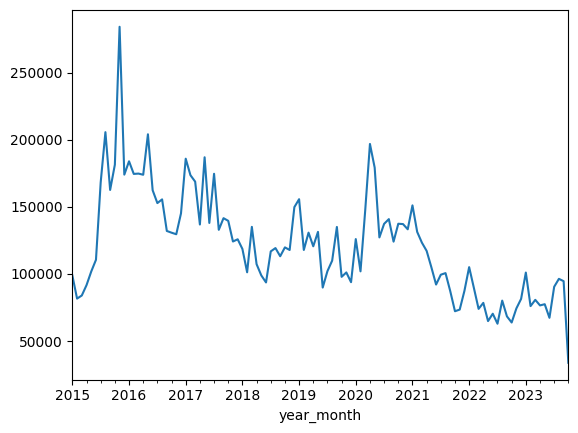

In [21]:
ratings[ratings.year_month >= '2015-01'].groupby('year_month').size().plot()

<Axes: xlabel='year_month'>

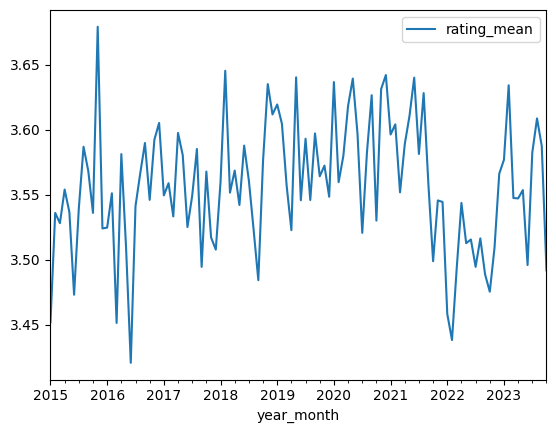

In [22]:
ratings[ratings.year_month >= '2015-01'][['year_month','rating']].groupby('year_month').agg(rating_mean = ('rating','mean')).plot()

In [16]:
# num users with less than 5 ratings
ratings_per_user = ratings.groupby('userId').size()
ratings_per_user.min()

np.int64(20)

In [17]:
ratings_per_item = ratings.groupby('movieId').size()
ratings_per_item[ratings_per_item < 5].count()/ ratings_per_item.count()

np.float64(0.48024445707788516)

In [18]:
# metrics for data after 2019
ratings_after_2019 = ratings[ratings.year_month >= '2019-01']
ratings_after_2019_per_user = ratings_after_2019.groupby('userId').size()
ratings_after_2019_per_item = ratings_after_2019.groupby('movieId').size()
ratings_after_2019_per_user.min(), ratings_after_2019_per_item[ratings_after_2019_per_item < 5].count()/ ratings_after_2019_per_item.count()

(np.int64(1), np.float64(0.5749001636661211))

In [19]:
ratings_after_2019.shape

(6020697, 5)

In [20]:
ratings[ratings.year_month >= '2015-01'].shape

(12902312, 5)

In [23]:
ratings.year_month.max()

Period('2023-10', 'M')

In [27]:
ratings.year_month.value_counts().sort_index()

year_month
1995-01        4
1996-01       42
1996-02      449
1996-03     9184
1996-04    51197
           ...  
2023-06    67301
2023-07    90409
2023-08    96315
2023-09    94583
2023-10    33804
Freq: M, Name: count, Length: 334, dtype: int64